Market Segmentation with Cluster Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

data = pd.read_csv('/content/3.12.+Example.csv')
display(data.head())

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


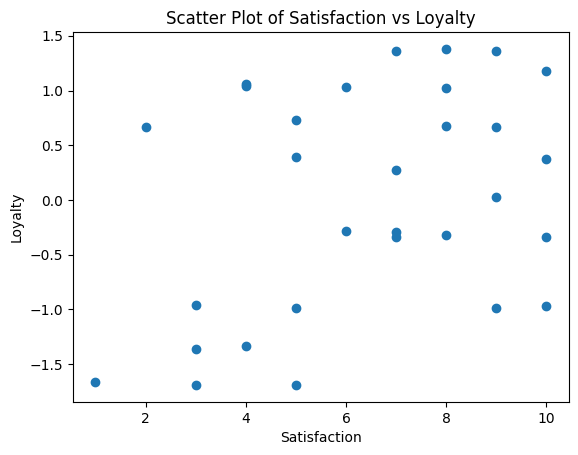

In [3]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.title('Scatter Plot of Satisfaction vs Loyalty')
plt.show()

In [5]:
from sklearn.cluster import KMeans

x=data.copy()
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [7]:
clusters=x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

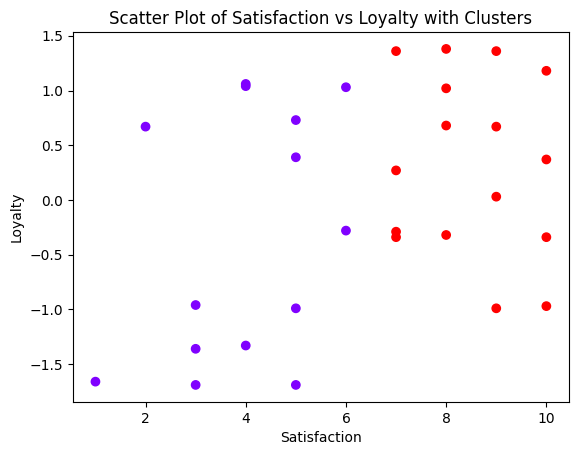

In [9]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.title('Scatter Plot of Satisfaction vs Loyalty with Clusters')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Satisfaction_scaled'] = scaler.fit_transform(data[['Satisfaction']])
display(data.head())

,Satisfaction,Loyalty,Satisfaction_scaled
0,4,-1.33,-0.931381
1,6,-0.28,-0.155230
2,5,-0.99,-0.543305
3,7,-0.29,0.232845
4,4,1.06,-0.931381


In [12]:
wcss = []
for i in range(1, 11):
    kmeans_scaled = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans_scaled.fit(data[['Satisfaction_scaled', 'Loyalty']])
    wcss.append(kmeans_scaled.inertia_)

display(wcss)

[59.963469999999994,
 29.799343031215773,
 17.900904335197932,
 10.24310523044559,
 7.788700768789443,
 6.547530444635686,
 5.57274494549627,
 4.385001907630522,
 3.8208655220883534,
 3.2308931526104416]

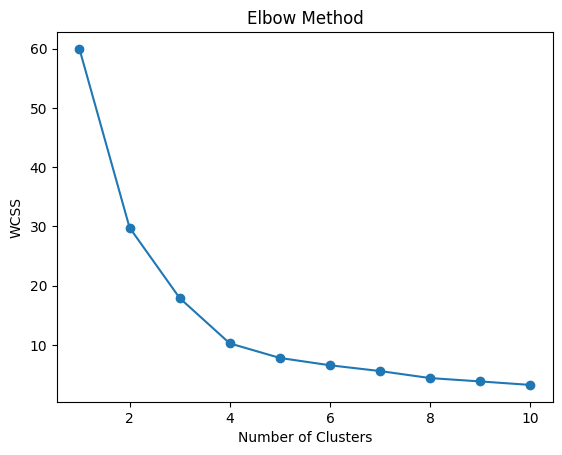

In [14]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

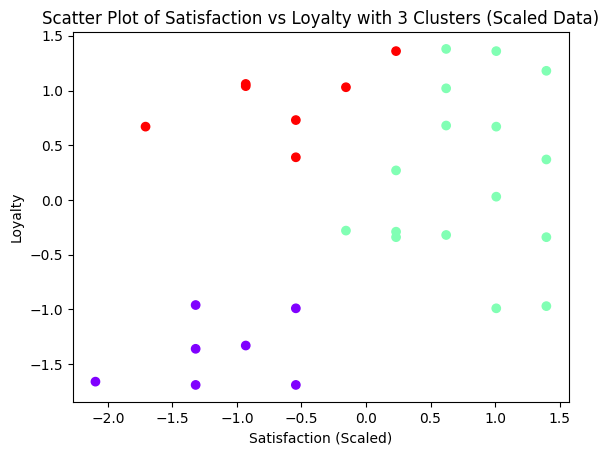

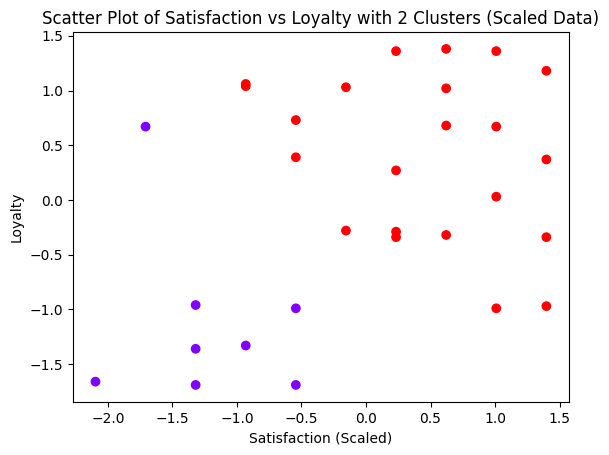

In [15]:
# K-Means with 3 clusters using scaled data
kmeans_scaled_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_scaled_3 = data.copy()
clusters_scaled_3['cluster_pred'] = kmeans_scaled_3.fit_predict(data[['Satisfaction_scaled', 'Loyalty']])

# Visualize the results with 3 clusters
plt.scatter(clusters_scaled_3['Satisfaction_scaled'], clusters_scaled_3['Loyalty'], c=clusters_scaled_3['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction (Scaled)')
plt.ylabel('Loyalty')
plt.title('Scatter Plot of Satisfaction vs Loyalty with 3 Clusters (Scaled Data)')
plt.show()

# K-Means with 2 clusters using scaled data (for comparison)
kmeans_scaled_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_scaled_2 = data.copy()
clusters_scaled_2['cluster_pred'] = kmeans_scaled_2.fit_predict(data[['Satisfaction_scaled', 'Loyalty']])

# Visualize the results with 2 clusters (for comparison)
plt.scatter(clusters_scaled_2['Satisfaction_scaled'], clusters_scaled_2['Loyalty'], c=clusters_scaled_2['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction (Scaled)')
plt.ylabel('Loyalty')
plt.title('Scatter Plot of Satisfaction vs Loyalty with 2 Clusters (Scaled Data)')
plt.show()

In [18]:
# Analyze the characteristics of the 2 clusters
cluster_means_2 = clusters_scaled_2.groupby('cluster_pred')[['Satisfaction', 'Loyalty']].mean()
display(cluster_means_2)

,Satisfaction,Loyalty
cluster_pred,,
0,3.250000,-1.126250
1,7.545455,0.410909


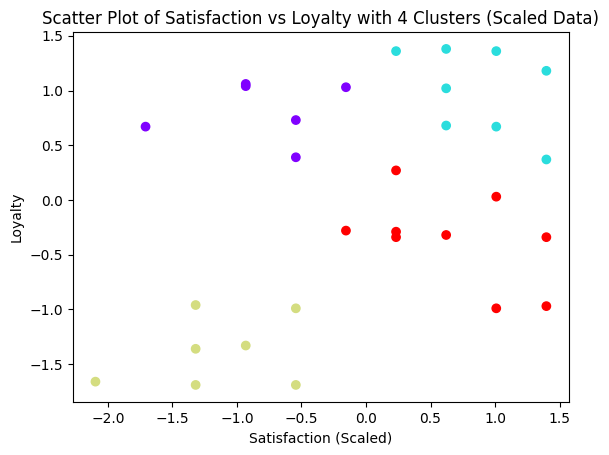

,Satisfaction,Loyalty
cluster_pred,,
0,4.333333,0.820000
1,8.625000,1.002500
2,3.428571,-1.382857
3,8.111111,-0.358889


In [19]:
# K-Means with 4 clusters using scaled data
kmeans_scaled_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_scaled_4 = data.copy()
clusters_scaled_4['cluster_pred'] = kmeans_scaled_4.fit_predict(data[['Satisfaction_scaled', 'Loyalty']])

# Visualize the results with 4 clusters
plt.scatter(clusters_scaled_4['Satisfaction_scaled'], clusters_scaled_4['Loyalty'], c=clusters_scaled_4['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction (Scaled)')
plt.ylabel('Loyalty')
plt.title('Scatter Plot of Satisfaction vs Loyalty with 4 Clusters (Scaled Data)')
plt.show()

# Analyze the characteristics of the 4 clusters
cluster_means_4 = clusters_scaled_4.groupby('cluster_pred')[['Satisfaction', 'Loyalty']].mean()
display(cluster_means_4)